image classification using a Convolutional Neural Network (CNN) based on the VGG16 architecture to distinguish between dogs and cats in images.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


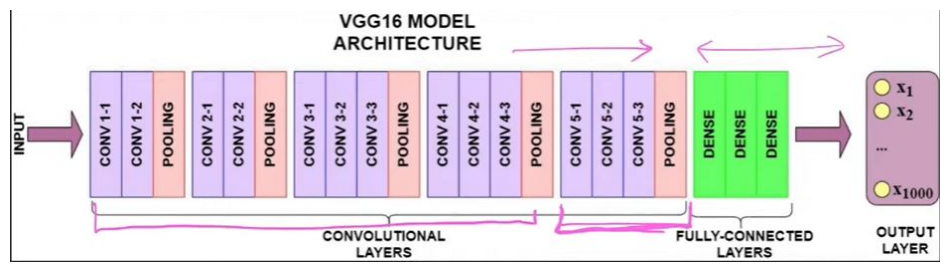

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/content/Transfer.JPG')

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

The first line downloads the Dogs vs. Cats dataset from Kaggle.

The zipfile module is used to extract the downloaded ZIP file containing the dataset.

Libraries from TensorFlow and Keras are imported to build and train the CNN model. The VGG16 model is also imported from Keras applications, which provides a pre-trained model.

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:55<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

VGG16 is loaded with ImageNet weights and is configured to exclude the top classification layer (include_top=False). The input shape is set to (150, 150, 3) for RGB images.

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


The base model (conv_base) is initially set to be trainable.

A loop iterates through the layers of the VGG16 model to freeze the layers until block5_conv1, allowing only the layers after it to be trainable. This is useful for fine-tuning the model while preserving the learned features from earlier layers.

The trainability status of each layer is printed.

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

A Sequential model is created, which is a linear stack of layers.
The VGG16 base model is added, followed by a Flatten layer to convert the 3D output to 1D.

A Dense layer with 256 neurons and ReLU activation is added, followed by a Dense output layer with 1 neuron and sigmoid activation for binary classification (Dog or Cat).

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

The ImageDataGenerator class is used to augment the training dataset (by performing operations like rescaling, shearing, zooming, and flipping).

The training and validation data are loaded from their respective directories with specified target sizes, batch sizes, and class modes (binary).

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


The model is compiled with the RMSprop optimizer, a binary cross-entropy loss function (suitable for binary classification), and accuracy as a metric to monitor.

In [ ]:
# Model Compilation
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


The model is trained on the training data for 10 epochs, with validation data used to monitor performance.

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 255ms/step - accuracy: 0.8292 - loss: 0.3628 - val_accuracy: 0.9334 - val_loss: 0.1715
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 242ms/step - accuracy: 0.9227 - loss: 0.1792 - val_accuracy: 0.9442 - val_loss: 0.1362
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 239ms/step - accuracy: 0.9424 - loss: 0.1428 - val_accuracy: 0.9458 - val_loss: 0.1330
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 253ms/step - accuracy: 0.9506 - loss: 0.1213 - val_accuracy: 0.9480 - val_loss: 0.1323
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 238ms/step - accuracy: 0.9577 - loss: 0.1074 - val_accuracy: 0.9494 - val_loss: 0.1239
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 252ms/step - accuracy: 0.9619 - loss: 0.0942 - val_accuracy: 0.9556 - val_loss: 0.1218
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 254ms/step - accuracy: 0.9690 - loss: 0.0830 - val_accuracy: 0.9492 - val_loss: 0.1321
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 238ms/step - accuracy: 0.9713 - loss: 0.07

 The model starts with an accuracy of approximately 82.92% in the first epoch, reaching about 97.95% by the final epoch, indicating effective learning. The loss values decrease over the epochs, with the training loss starting at around 0.3628 and dropping to 0.0593, while the validation loss shows a similar declining trend. This demonstrates that the model is not only improving on the training dataset but is also generalizing well to the validation dataset, as evidenced by the consistent increase in validation accuracy.

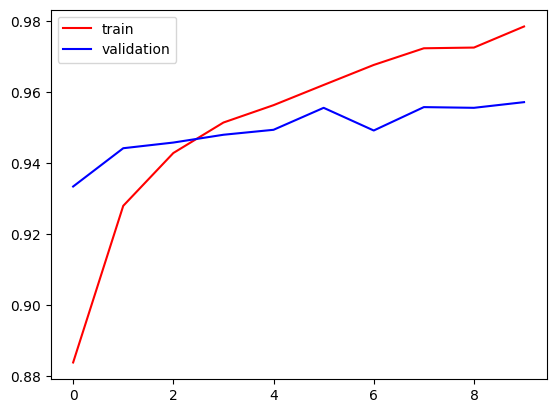

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

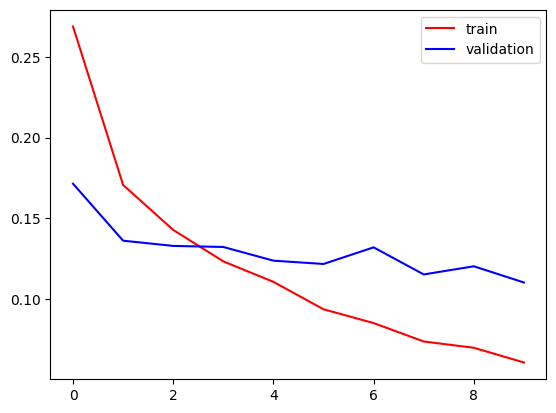

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


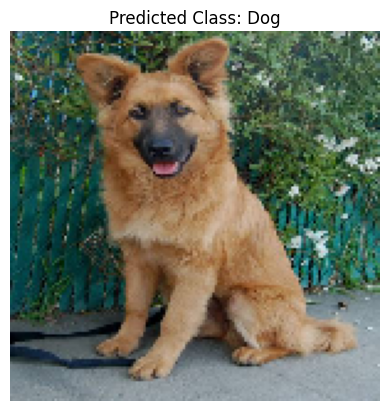

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Normalize the image
    return img, img_array

# Predict function
def predict_image_class(model, img_path):
    img, img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)  # Get the prediction from the model
    if prediction[0] > 0.5:
        predicted_class = 'Dog'
    else:
        predicted_class = 'Cat'

    # Display the image with predicted label
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage
img_path = '/content/test/dogs/dog.10014.jpg'  # Replace with your test image path
predict_image_class(model, img_path)
